### Clustering

**Instruction:**

1. Apply K-Means clustering (from scikit-learn) with k=3 (since 3 species or clusters).
    -  Fit the model on features (exclude class).

    - Predict clusters and compare with actual classes using Adjusted Rand Index (ARI).

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
"""
- Clustering is grouping similar things together - without being told what group they belong to.
- Using K-Means Clustering, we'll try and group the flowers into 3 cluster since there are 3 species.
"""

# Loading the data
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Normalizing the numerical features
scaler = MinMaxScaler()
X = scaler.fit_transform(df_iris[iris.feature_names])


# K-Means clustering with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
df_iris['cluster_3'] = kmeans_3.fit_predict(X)

# Evaluating with ARI (tells us how well the clustering matches the true labels)
# (1.0 = excellent match, 0.0 = random assignment)
true_labels = iris.target
predicted_clusters = df_iris['cluster_3']
ari_score = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index (k=3): {ari_score:.3f}")



Adjusted Rand Index (k=3): 0.716


- As seen, it's not a perfect match but the ARI score is well above 0.5, it is 0.716, meaning it has been able to predict with an accuracy of 71.6%

------------------------------------------------------

**Instruction:**

2. Experiment: Try k=2 and k=4; plot elbow curve to justify optimal k.

Adjusted Rand Index (k=2): 0.57
Adjusted Rand Index (k=4): 0.623


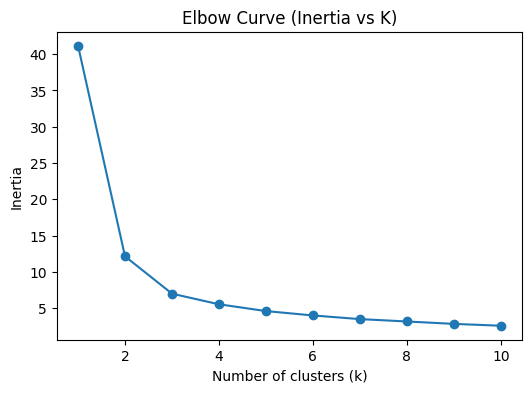

In [ ]:
# Experimenting with K-Means clustering with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
df_iris['cluster_2'] = kmeans_2.fit_predict(X)

# Evaluating with ARI (tells us how well the clustering matches the true labels)
# (1.0 = excellent match, 0.0 = random assignment)
true_labels = iris.target
predicted_clusters = df_iris['cluster_2']
ari_score = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index (k=2): {ari_score:.2f}")


# Experimenting with K-Means clustering with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df_iris['cluster_4'] = kmeans_4.fit_predict(X)

# Evaluating with ARI (tells us how well the clustering matches the true labels)
# (1.0 = excellent match, 0.0 = random assignment)
true_labels = iris.target
predicted_clusters = df_iris['cluster_4']
ari_score = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index (k=4): {ari_score:.3f}")



# Elbow method (for k=1 to 10) used when we don't know how many clusters to use
inertia_values = [] # how tight the clusters are
k_values = list(range(1, 11))
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X)
    inertia_values.append(model.inertia_)

# Plotting elbow curve (inertia vs. k) to look for 'elbow'
# the point where adding more clusters doesn't help much
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve (Inertia vs K)")
plt.savefig("elbow_curve.png")
plt.show()



- Adjusted Rand Index (k=2): 0.57 is less than Adjusted Rand Index (k=3): 0.716.

- Adjusted Rand Index (k=4): 0.623 is less than Adjusted Rand Index (k=3): 0.716.

- This shows that when k=3, it is the optimal k, this is further backed by the elbow method where after 3, the inertia reduces slowly.

------------------------------------------------------

**Instruction:**

3. Visualize clusters (e.g., scatter plot of petal length vs width, colored by cluster).

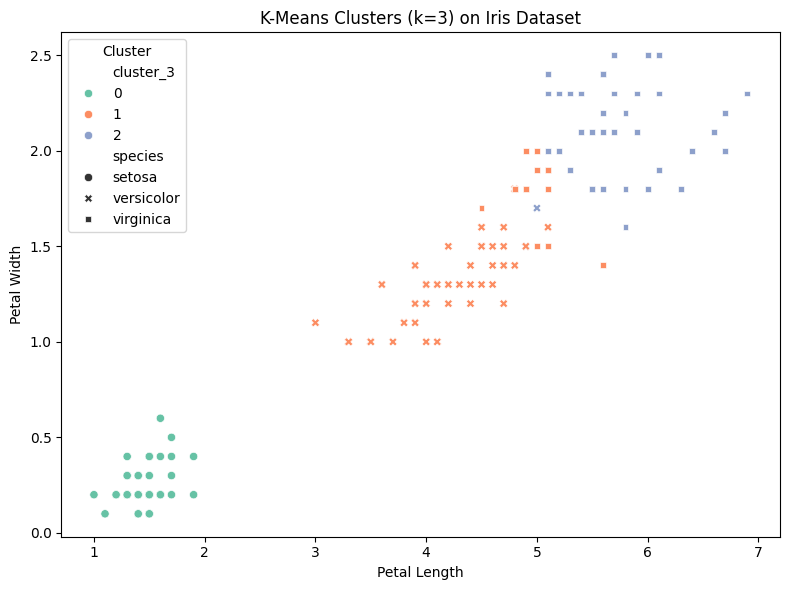

In [7]:
# Visualizing clusters (petal length vs width, colored by cluster)
# This helps see how well the model separated the flower types.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_iris[iris.feature_names[2]],
    y=df_iris[iris.feature_names[3]],
    hue=df_iris['cluster_3'],
    palette='Set2',
    style=df_iris['species']
)
plt.title("K-Means Clusters (k=3) on Iris Dataset")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig("cluster_scatter_plot.png")
plt.show()

- As seen, setosa has petal length between 1 and 2, and petal width between 0.0 and 0.7. They form the bottom left cluster.

- For versicolor and virginica, at around petal length 5.3 and petal width 1.9, there is a small overlap between these two clusters. This means the model ought to be enhanced for better prediction.

------------------------------------------------------